In [1]:
# Import these libraries: Geopandas, Pandas and Matplotlip.pyplot & contextily 

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx



<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Read the Neighbourhood Data in the Assignment folder
    

</div>

In [2]:
phili_neighb = gpd.read_file("data/Neighborhoods_Philadelphia/Neighborhoods_Philadelphia.shp")

In [3]:
phili_neighb.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."



<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> Read the Swimming Pool Dataset in the Assignment Folder
</div>

In [4]:
pools = gpd.read_file("data/swimming_pools.shp")

In [5]:
pools.head()

,OBJECTID,NAME,PARK_NAME,ADDRESS_91,ZIP_CODE,POOL_TYPE,POOL_STATU,COMMENTS,DATE_INSTA,DATA_SOURC,geometry
0,1,Fox Chase Pool,Fox Chase Recreation Center,7901 RIDGEWAY ST,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.08232 40.07367)
1,2,Mitchell Pool,Thomas Mitchell Memorial Playground,3600 WHITEHALL LN,19114,OUTDOOR,ACTIVE,None,2012-01-01,Capital 2019; Finder,POINT (-74.99143 40.06830)
2,3,Jardel Pool,Thomas E. Jardel Memorial Field,1400 COTTMAN AVE,19111,OUTDOOR,ACTIVE,None,None,Finder; Previous GIS Data,POINT (-75.07590 40.05629)
3,4,Jacobs Pool,George Jacobs Playground,4500 LINDEN AVE,19136,OUTDOOR,ACTIVE,None,None,Aquatics 2019; Finder,POINT (-75.00284 40.05266)
4,5,Morris Estates Pool,Morris Estate Cultural Center,1610 CHELTEN AVE,19141,OUTDOOR,ACTIVE,Emergency access is from Chelten around the bu...,None,Finder; Administration,POINT (-75.14641 40.04992)


## 1. Overlay Maps



<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> Create and Overlay Map of the two datasets (Neighbourhoods and swimming pools). Use Matplotlib fig, ax = plt.subplots and pass each ax to the two plots
</div>

<AxesSubplot:>

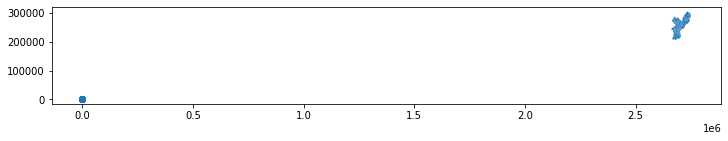

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
phili_neighb.plot(ax=ax)
pools.plot(ax=ax)


<div class="alert alert-block alert-info">
<span style='font-family:Georgia'> That was not the plot as we might have Excpected it. Can you think of a reason why this went wrong. Fix it (Hint: CRS)
</div>

In [11]:
phili_neighb.crs

<Derived Projected CRS: EPSG:2272>
Name: NAD83 / Pennsylvania South (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Pennsylvania - counties of Adams; Allegheny; Armstrong; Beaver; Bedford; Berks; Blair; Bucks; Butler; Cambria; Chester; Cumberland; Dauphin; Delaware; Fayette; Franklin; Fulton; Greene; Huntingdon; Indiana; Juniata; Lancaster; Lawrence; Lebanon; Lehigh; Mifflin; Montgomery; Northampton; Perry; Philadelphia; Schuylkill; Snyder; Somerset; Washington; Westmoreland; York.
- bounds: (-80.53, 39.71, -74.72, 41.18)
Coordinate Operation:
- name: SPCS83 Pennsylvania South zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
pools_crs = pools.to_crs(epsg=2272)

In [13]:
# check it worked
pools_crs.crs == phili_neighb.crs

True

<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Reproject the pools data to the same CRS of the polygon data
* <span style='font-family:Georgia'> Plot now the reprojected data and the polygons together.
    

</div>

<AxesSubplot:>

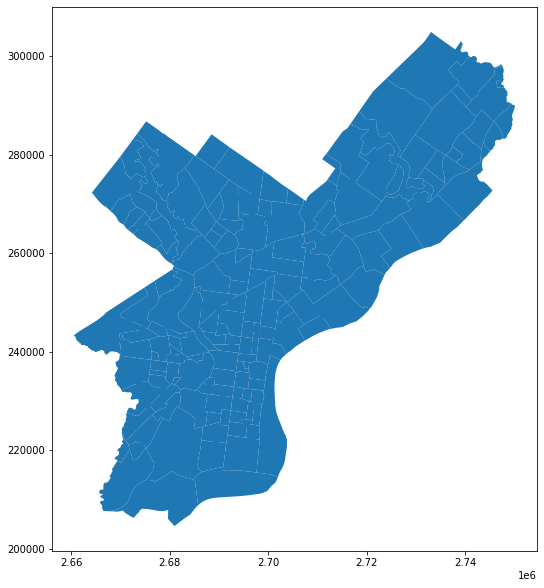

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
phili_neighb.plot(ax=ax)
pools_crs.plot(ax=ax)


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> You might not see the Points. Hint all the points and the polygon data are all using Geopandas default color Blue. Change the color of both datasets to a color of your choice.

</div>

<AxesSubplot:>

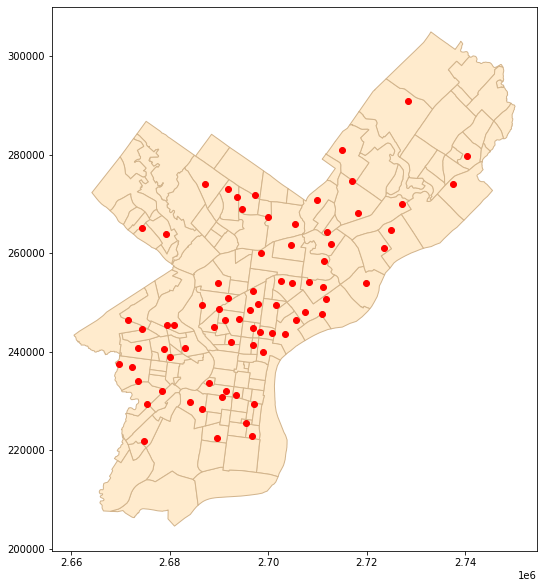

In [16]:
fig, ax = plt.subplots(figsize=(12,10))
phili_neighb.plot(ax=ax,
                  color="blanchedalmond",
                  edgecolor="tan")
pools_crs.plot(ax=ax, 
               color="red")

## 2. Add Basemaps



<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create the simming pool points map with a base map. Use Contextly. Do not forget to project the swimming pools datse to epsg 3857 to work properly with Contextly.
    
* <span style='font-family:Georgia'> Hint (contextly has add_basemap), You might use Stamen TonerLite for your first basemap

</div>



In [17]:
pools_ctx = pools.to_crs(epsg=3857)

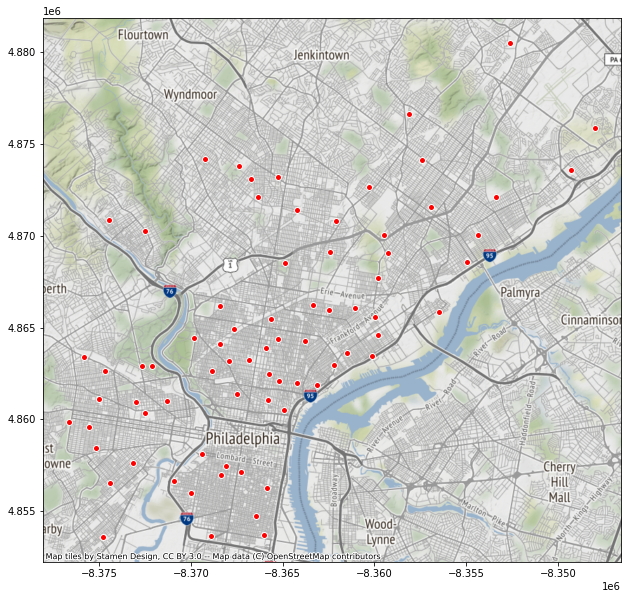

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
pools_ctx.plot(ax=ax, 
               color="red",
               edgecolor="white");
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite);

## 3. Choropleth Map


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a choropleth map from the Crime counts dataset we created in the last step of the 3.6 assignment.
    
* <span style='font-family:Georgia'> You might copy the Geojson file we have created to your current folder

</div>


In [20]:
crimes = gpd.read_file("data/neighbourhod_crimes.Geojson")

In [21]:
crimes.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,Counts,geometry
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ..."
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ..."
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ..."
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ..."
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,282,"POLYGON ((2686769.727 263625.367, 2686921.108 ..."



<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a Choropleth Map with the Counts Column

</div>


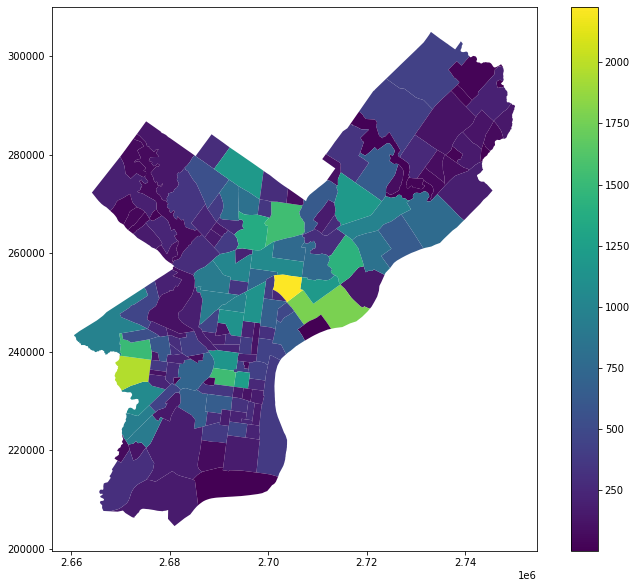

In [24]:
crimes.plot(column="Counts", figsize = (12,10), legend=True);


<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Normalize the Counts column with the Shape_are column. Divide the counts to the shape area and multiply with 100. Call the new column any name you want.

</div>


In [25]:
crimes["normalized_crimes"] = (crimes["Counts"]/crimes["Shape_Area"])*100

# could also do: (crimes.Counts / crimes.Shape_Area) * 100

In [26]:
crimes.head()

,NAME,LISTNAME,MAPNAME,Shape_Leng,Shape_Area,Counts,geometry,normalized_crimes
0,BRIDESBURG,Bridesburg,Bridesburg,27814.546521,4.458626e+07,142,"POLYGON ((2719789.837 256235.538, 2719814.855 ...",0.000318
1,BUSTLETON,Bustleton,Bustleton,48868.458365,1.140504e+08,413,"POLYGON ((2733378.171 289259.945, 2732818.985 ...",0.000362
2,CEDARBROOK,Cedarbrook,Cedarbrook,20021.415802,2.487174e+07,281,"POLYGON ((2685267.950 279747.336, 2685272.265 ...",0.001130
3,CHESTNUT_HILL,Chestnut Hill,Chestnut Hill,56394.297195,7.966498e+07,134,"POLYGON ((2678490.151 284400.400, 2678518.732 ...",0.000168
4,EAST_FALLS,East Falls,East Falls,27400.776417,4.057689e+07,282,"POLYGON ((2686769.727 263625.367, 2686921.108 ...",0.000695




<div class="alert alert-block alert-info">
    
<b>Instructions:</b> 


* <span style='font-family:Georgia'> Create a choropleth Map. Use the normalized column you have create above. Set legend=True to see the legend.

</div>


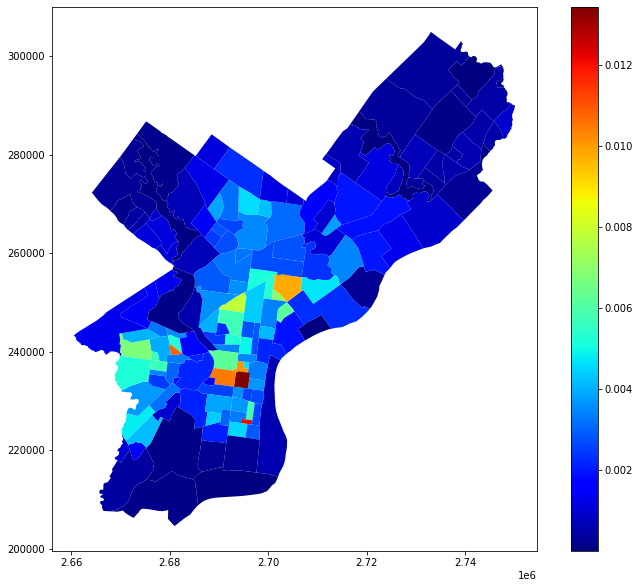

In [29]:
crimes.plot(column="normalized_crimes", cmap = "jet", figsize = (12,10), legend=True);

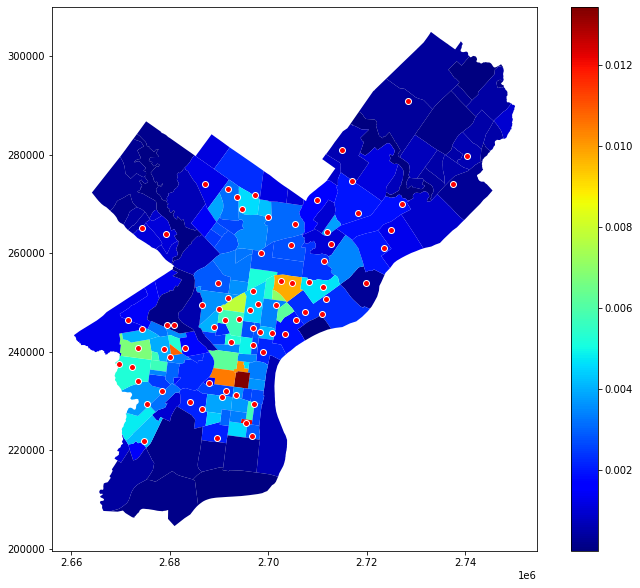

In [30]:
# is there a relationship with pools?
fig, ax = plt.subplots(figsize=(12,10))
crimes.plot(ax=ax, column="normalized_crimes", cmap = "jet", figsize = (12,10), legend=True);
pools_crs.plot(ax=ax, 
               color="red",
               edgecolor="white");


<div class="alert alert-block alert-success">
<font size="50"><center><b font size="50">Good Job</b></font></center>
</div>
